In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [4]:
# Load cleaned dataset
df = pd.read_csv('../data/cleaned_fake_job_postings.csv')

# Quick check
df.head()


job_id                              title  \
0      99                    IC&E Technician   
1     145                       Forward Cap.   
2     174  Technician Instrument & Controls    
3     181                    Sales Executive   
4     216            IC&E Technician Mt Poso   

                             location            department  salary_range  \
0                   US, , Stocton, CA          Oil & Energy  95000-115000   
1                                 NaN                   NaN           NaN   
2                                  US  Power Plant & Energy           NaN   
3                     PK, SD, Karachi                 Sales           NaN   
4  US, CA, Bakersfield, CA / Mt. Poso          Oil & Energy  95000-115000   

                                     company_profile  \
0                                                ...   
1                                                NaN   
2  Edison International and Refined Resources hav...   
3                                                NaN   
4                                                ...   

                                         description  \
0  IC&amp;E Technician | Bakersfield, CA Mt. Poso...   
1  The group has raised a fund for the purchase o...   
2  Technician Instrument &amp; ControlsLocation D...   
3                                    Sales Executive   
4  IC&amp;E Technician | Bakersfield, CA Mt. Poso...   

                                        requirements  \
0  QualificationsKnowledge, Skills &amp; Abilitie...   
1                                                NaN   
2  JOB QUALIFICATIONS-Ability to understand proce...   
3                                    Sales Executive   
4   QualificationsKnowledge, Skills &amp; Abiliti...   

                                            benefits  telecommuting  \
0  BENEFITSWhat is offered:Competitive compensati...              0   
1                                                NaN              0   
2  we are a team of almost 8,000 employees who he...              0   
3                                    Sales Executive              0   
4  BENEFITSWhat is offered:Competitive compensati...              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              1       Full-time    Mid-Senior level   
1                 0              0             NaN                 NaN   
2                 1              1       Full-time    Mid-Senior level   
3                 0              0             NaN                 NaN   
4                 1              1       Full-time    Mid-Senior level   

          required_education                             industry function  \
0  High School or equivalent                         Oil & Energy    Other   
1                        NaN                                  NaN      NaN   
2              Certification  Electrical/Electronic Manufacturing    Other   
3                        NaN                                  NaN    Sales   
4  High School or equivalent                         Oil & Energy    Other   

   fraudulent                                               text  \
0           1  IC&E Technician                               ...   
1           1  Forward Cap.  The group has raised a fund for ...   
2           1  Technician Instrument & Controls  Edison Inter...   
3           1   Sales Executive  Sales Executive Sales Executive   
4           1  IC&E Technician Mt Poso                       ...   

                                        cleaned_text  
0  ice technician staffing amp recruiting done ri...  
1  forward cap group raised fund purchase home so...  
2  technician instrument control edison internati...  
3       sale executive sale executive sale executive  
4  ice technician mt poso staffing amp recruiting...

In [5]:
# Define input and output
X = df['cleaned_text']
y = df['fraudulent']


In [6]:
# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,    # Take top 5000 words (you can adjust)
    stop_words='english'  # Remove English stopwords automatically
)

# Fit and transform
X_tfidf = tfidf.fit_transform(X)

# Check shape
print(X_tfidf.shape)


(1732, 5000)


In [7]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print(X_train.shape, X_test.shape)


(1385, 5000) (347, 5000)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
# Create the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [10]:
# Predict on test set
y_pred = model.predict(X_test)


In [11]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8934


In [12]:
# Other important metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.8908
Recall: 0.8960
F1 Score: 0.8934


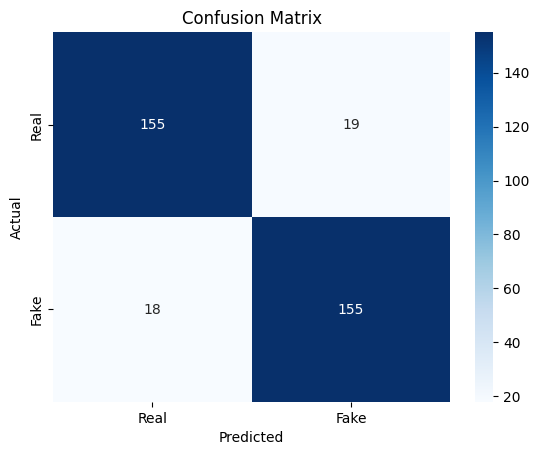

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [14]:
# Detailed classification report
print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))


              precision    recall  f1-score   support

        Real       0.90      0.89      0.89       174
        Fake       0.89      0.90      0.89       173

    accuracy                           0.89       347
   macro avg       0.89      0.89      0.89       347
weighted avg       0.89      0.89      0.89       347



In [15]:
from sklearn.ensemble import RandomForestClassifier
import joblib  # To save models


In [16]:
# Create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
# Predict on test set
y_pred_rf = rf_model.predict(X_test)


In [18]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Other metrics
print(classification_report(y_test, y_pred_rf, target_names=['Real', 'Fake']))


Random Forest Accuracy: 0.9078
              precision    recall  f1-score   support

        Real       0.90      0.91      0.91       174
        Fake       0.91      0.90      0.91       173

    accuracy                           0.91       347
   macro avg       0.91      0.91      0.91       347
weighted avg       0.91      0.91      0.91       347



In [19]:
# Save the model to file
joblib.dump(rf_model, '../models/fake_job_post_rf.pkl')

# Also save your TF-IDF vectorizer (important!)
joblib.dump(tfidf, '../models/tfidf_vectorizer.pkl')


['../models/tfidf_vectorizer.pkl']